In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

/home/alex/NuMI/PELEE/


In [78]:
ending = "Jan19b"

isBlockwise = False
isNue = True

In [79]:
def calcCov(var, bins, ncv_nu, ncv_total, uni_counts, NUnis, plot=False, save=False, axis_label=None, pot=None, isrun3=False, xticks=None, xhigh=None): 
    
    # ncv nu is the neutrino event rate -- i.e. what gets varied in the systematics 
    # ncv total is the total event rate -- (MC + EXT or estimated signal)
    # when background subtracting these two are the same  
    
    # compute the cov matrix 
    cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    
    N = NUnis
    print('contribution = 1/', N)

    #####################################################
    
    for k in range(len(uni_counts)): 
        
        uni = uni_counts[k]
        #print("uni = ", uni)

        for i in range(len(bins)-1): 

            cvi = ncv_nu[i]
            uvi = uni[i]
            #print("uvi = ", uvi)

            for j in range(len(bins)-1): 
                
                cvj = ncv_nu[j]
                uvj = uni[j]
        
                c = ((uvi - cvi)*(uvj - cvj)) / N

                cov[i][j] += c
                
                #cov[i][j] = cov[i][j]/N
                
                #print("ncv_total[i]*ncv_total[j] ", ncv_total[i]*ncv_total[j])
                #print(ncv_total[i])
                if ncv_total[i]*ncv_total[j] != 0: 
                    frac_cov[i][j] += c/(ncv_total[i]*ncv_total[j])
                    #frac_cov[i][j] = c/(ncv_total[i]*ncv_total[j])
            
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, cov, cmap='OrRd', edgecolors='k')
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)

        plt.title('Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
            print('saving to: '+save)
        plt.show()
        
        ##################################
        # fractional covariance 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, frac_cov, cmap='OrRd', edgecolors='k')#, vmin=0, vmax=.03)
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        plt.title('Fractional Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_frac_cov.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################    
    # compute the corr matrix 

    for i in range(len(cov)): 
        for j in range(len(cov[i])): 
            
            #print(i, j, cov[i][j], cov[i][i], cov[j][j])

            if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
                cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))
            
            #print(cor[i][j])
    
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))

        plt.pcolor(bins, bins, cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
    

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])
            
        plt.title('Correlation Matrix', fontsize=16)
        if save: 
            plt.savefig(save+var+"_cor.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################
    
    # sys_err = [np.sqrt(x) for x in np.diagonal(cov)]
    # percent error = [y/z for y,z in zip(sys_err, ncv)] # w.r.t. to whatever event rate is being used (total or background subtracted)
        
    dictionary = {
        'cov' : cov, 
        'frac_cov' : frac_cov, 
        'cor' : cor,
        'fractional_uncertainty' : np.sqrt(np.diag(frac_cov))
    }
           
    return dictionary

## Angle

In [80]:
if isBlockwise == True:
    data_signal_nuWro = pd.read_csv("data_signal_MC_nuWro_input_angleDiff_comb_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == True:
    data_signal_nuWro = pd.read_csv("nue_nuWro_MC_Data_Signal_recoCut_run1_angle_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == False:
    data_signal_nuWro = pd.read_csv("numu_nuWro_MC_Data_Signal_recoCut_run1_angle_"+ending+".csv", header=None)    

data_signal_nuWro = data_signal_nuWro.values[:, 0]

print(data_signal_nuWro)

[-0.15726992  0.94498491  0.95641042  0.75974582  2.21033867  3.51911618
  3.16545063  6.67807978 11.30195708 20.77641932]


In [81]:
#RUN 1 ONLY
if isBlockwise == True:
    data_signal_genie = pd.read_csv("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_blockwise_recoCut_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == True:
    data_signal_genie = pd.read_csv("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == False:
    data_signal_genie = pd.read_csv("numu_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", header=None)

data_signal_genie = data_signal_genie.values[:, 0]

print(data_signal_genie)

[ 0.32608114  0.58600575  0.84601623  1.00770023  1.67939013  2.49283483
  3.62434556  5.56009223 11.34538837 26.18945348]


In [82]:
if isBlockwise == True:
    bins = np.arange(0, 21, 1)
elif isBlockwise == False:
    bins = np.arange(0, 11, 1)

print(bins)


full_info = {}
xvar="Energy"


full_info = calcCov(xvar, bins, 
                            data_signal_genie, 
                            data_signal_genie, 
                            [data_signal_nuWro ], 1)

[ 0  1  2  3  4  5  6  7  8  9 10]
contribution = 1/ 1


In [83]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([full_info['cov'][i][j]])
        frac_cov[i][j] = sum([full_info['frac_cov'][i][j]])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_ppfx = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

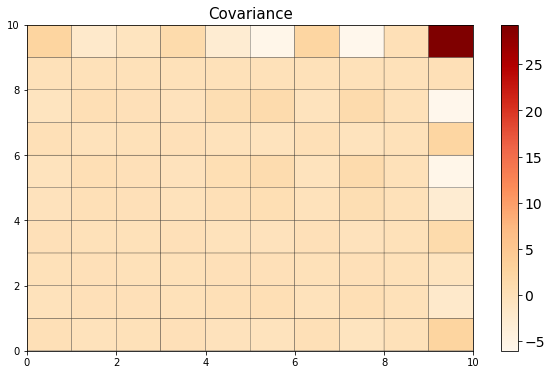

In [84]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, (detsys_dict_ppfx['cov']), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [85]:
if isBlockwise == True:
    np.savetxt("nuWro_extra_unisim_uncertainties_angle_"+ending+".csv", 
                   detsys_dict_ppfx['cov'],
                   delimiter =", ", 
                   fmt ='% s')

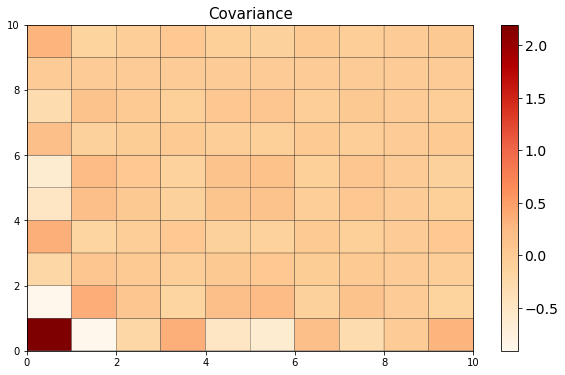

In [86]:
# Now we have the generalise this matrix to work for the combined R1 and R3

#Start with the fractional cov matrix

fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, (detsys_dict_ppfx['frac_cov']), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [87]:
# Now fetch the R1+R3 CV genie value
if isBlockwise == True:
    data_signal_genie_comb = pd.read_csv("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == True:
    data_signal_genie_comb = pd.read_csv("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == False:
    data_signal_genie_comb = pd.read_csv("numu_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", header=None)

    
data_signal_genie_comb = data_signal_genie_comb.values[:, 0]

print(data_signal_genie_comb)

[ 1.10186068  1.91905171  1.92910177  3.20576209  5.43678214  6.68266298
  9.65650884 16.65849652 30.26753438 78.40512385]


In [88]:
#Multiply the fractional cov matrix by the new CV value

temp_cov = detsys_dict_ppfx['frac_cov']

comb_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1):
    for j in range(len(bins)-1):
        if data_signal_genie_comb[i]*data_signal_genie_comb[j] != 0:
            
            comb_cov[i][j] += temp_cov[i][j]*(data_signal_genie_comb[i]*data_signal_genie_comb[j])
            

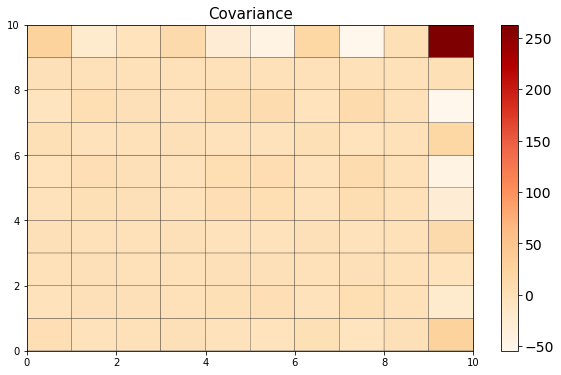

In [89]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, comb_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [90]:
if isBlockwise == True:
    np.savetxt("nuWro_extra_unisim_uncertainties_angle_comb_"+ending+".csv", 
                   comb_cov,
                   delimiter =", ", 
                   fmt ='% s')
elif isBlockwise == False and isNue == True:
    np.savetxt("nuWro_extra_unisim_uncertainties_angle_nueonly_"+ending+".csv", 
                   comb_cov,
                   delimiter =", ", 
                   fmt ='% s')
elif isBlockwise == False and isNue == False:
    np.savetxt("nuWro_extra_unisim_uncertainties_angle_numuonly_"+ending+".csv", 
                   comb_cov,
                   delimiter =", ", 
                   fmt ='% s')  

## Lepton

In [91]:
if isBlockwise == True:
    data_signal_nuWro_lepton = pd.read_csv("data_signal_MC_nuWro_input_leptonMom_comb_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == True:
    data_signal_nuWro_lepton = pd.read_csv("nue_nuWro_MC_Data_Signal_recoCut_run1_lepton_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == False:
    data_signal_nuWro_lepton = pd.read_csv("numu_nuWro_MC_Data_Signal_recoCut_run1_lepton_"+ending+".csv", header=None)    

data_signal_nuWro_lepton = data_signal_nuWro_lepton.values[:, 0]


print(data_signal_nuWro_lepton)

[ 8.36354517 20.22203992 10.4089869   6.28505755  2.37682724  1.27524831
  0.80869354  0.41483426]


In [92]:
#RUN 1 ONLY

if isBlockwise == True:
    data_signal_genie_lepton = pd.read_csv("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_blockwise_recoCut_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == True:
    data_signal_genie_lepton = pd.read_csv("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == False:
    data_signal_genie_lepton = pd.read_csv("numu_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", header=None)

data_signal_genie_lepton = data_signal_genie_lepton.values[:, 0]
    
print(data_signal_genie_lepton)

[ 7.16774974 20.2288866  12.96634445  6.95381798  3.17507775  1.39007549
  0.74786084  1.0274951 ]


In [93]:
if isBlockwise == True:
    bins = np.arange(0, 17, 1)
elif isBlockwise == False:
    bins = np.arange(0, 9, 1)   


print(bins)


full_info_lepton = {}
xvar="LeptonMom"


full_info_lepton = calcCov(xvar, bins, 
                            data_signal_genie_lepton, 
                            data_signal_genie_lepton, 
                            [data_signal_nuWro_lepton ], 1)

[0 1 2 3 4 5 6 7 8]
contribution = 1/ 1


In [94]:
cov_lepton = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov_lepton = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor_lepton = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov_lepton[i][j] = sum([full_info_lepton['cov'][i][j]])
        frac_cov_lepton[i][j] = sum([full_info_lepton['frac_cov'][i][j]])
        
# compute the corr matrix 
for i in range(len(cov_lepton)): 
    for j in range(len(cov_lepton[i])): 

        if np.sqrt(cov_lepton[i][i])*np.sqrt(cov_lepton[j][j]) != 0: 
            cor_lepton[i][j] = cov_lepton[i][j] / (np.sqrt(cov_lepton[i][i])*np.sqrt(cov_lepton[j][j]))

detsys_dict_ppfx_lepton = {
    'cov' : cov_lepton, 
    'frac_cov' : frac_cov_lepton,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov_lepton)),
    'cor' : cor_lepton
} 

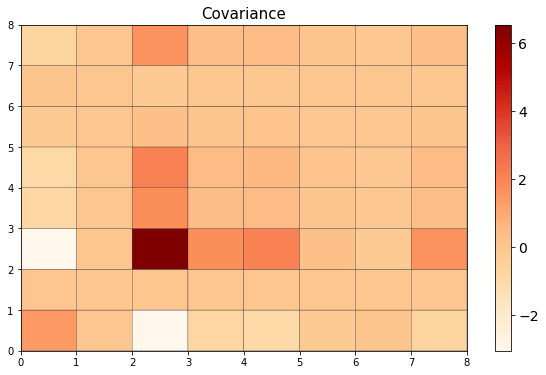

In [95]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, (detsys_dict_ppfx_lepton['cov']), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [96]:
if isBlockwise == True:
    np.savetxt("nuWro_extra_unisim_uncertainties_lepton_"+ending+".csv", 
                   detsys_dict_ppfx_lepton['cov'],
                   delimiter =", ", 
                   fmt ='% s')

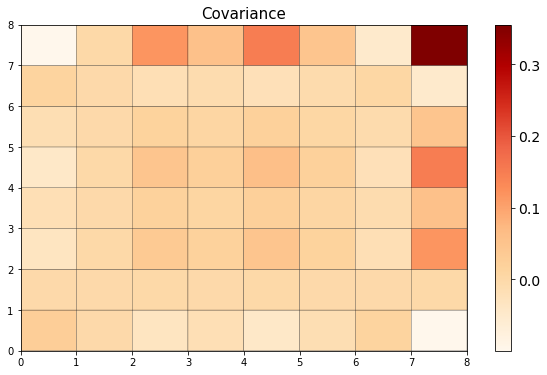

In [97]:
# Now we have the generalise this matrix to work for the combined R1 and R3

#Start with the fractional cov matrix

fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, (detsys_dict_ppfx_lepton['frac_cov']), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [98]:
# Now fetch the R1+R3 CV genie value

if isBlockwise == True:
    data_signal_genie_comb_lepton  = pd.read_csv("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == True:
    data_signal_genie_comb_lepton  = pd.read_csv("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == False:
    data_signal_genie_comb_lepton  = pd.read_csv("numu_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", header=None)

data_signal_genie_comb_lepton = data_signal_genie_comb_lepton.values[:, 0]

print(data_signal_genie_comb_lepton)

[22.31536796 54.08118909 36.35617182 20.51811225  9.72911695  4.81284749
  3.05209079  4.3979886 ]


In [99]:
#Multiply the fractional cov matrix by the new CV value

temp_cov_lepton = detsys_dict_ppfx_lepton['frac_cov']

comb_cov_lepton = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1):
    for j in range(len(bins)-1):
        if data_signal_genie_comb_lepton[i]*data_signal_genie_comb_lepton[j] != 0:
            
            comb_cov_lepton[i][j] += temp_cov_lepton[i][j]*(data_signal_genie_comb_lepton[i]*data_signal_genie_comb_lepton[j])
            

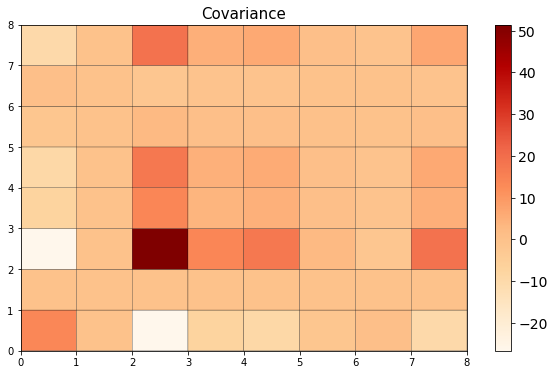

In [100]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, (comb_cov_lepton), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [101]:
if isBlockwise == True:
    np.savetxt("nuWro_extra_unisim_uncertainties_lepton_comb_"+ending+".csv", 
                   comb_cov_lepton,
                   delimiter =", ", 
                   fmt ='% s')
elif isBlockwise == False and isNue == True:
    np.savetxt("nuWro_extra_unisim_uncertainties_lepton_nueonly_"+ending+".csv", 
                   comb_cov_lepton,
                   delimiter =", ", 
                   fmt ='% s')
elif isBlockwise == False and isNue == False:
    np.savetxt("nuWro_extra_unisim_uncertainties_lepton_numuonly_"+ending+".csv", 
                   comb_cov_lepton,
                   delimiter =", ", 
                   fmt ='% s')  

## Energy

In [102]:
if isBlockwise == True:
    data_signal_nuWro_energy = pd.read_csv("data_signal_MC_nuWro_input_recoE_comb_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == True:
    data_signal_nuWro_energy = pd.read_csv("nue_nuWro_MC_Data_Signal_recoCut_run1_energy_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == False:
    data_signal_nuWro_energy = pd.read_csv("numu_nuWro_MC_Data_Signal_recoCut_run1_energy_"+ending+".csv", header=None)    


data_signal_nuWro_energy = data_signal_nuWro_energy.values[:, 0]

print(data_signal_nuWro_energy)

[ 8.6668854  27.61469215  9.74686459  2.82537208  0.92893624  0.37248243]


In [103]:
#RUN 1 ONLY

if isBlockwise == True:
    data_signal_genie_energy = pd.read_csv("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == True:
    data_signal_genie_energy = pd.read_csv("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == False:
    data_signal_genie_energy = pd.read_csv("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", header=None)

data_signal_genie_energy = data_signal_genie_energy.values[:, 0]

print(data_signal_genie_energy)

[ 7.54933089 28.90186196 11.869288    3.38853422  1.18822898  0.7600639 ]


In [104]:
if isBlockwise == True:
    bins = np.arange(0, 13, 1)
elif isBlockwise == False:
    bins = np.arange(0, 7, 1)

print(bins)


full_info_energy = {}
xvar="Energy"


full_info_energy = calcCov(xvar, bins, 
                            data_signal_genie_energy, 
                            data_signal_genie_energy, 
                            [data_signal_nuWro_energy ], 1)

[0 1 2 3 4 5 6]
contribution = 1/ 1


In [105]:
cov_energy = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov_energy = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor_energy = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov_energy[i][j] = sum([full_info_energy['cov'][i][j]])
        frac_cov_energy[i][j] = sum([full_info_energy['frac_cov'][i][j]])
        
# compute the corr matrix 
for i in range(len(cov_energy)): 
    for j in range(len(cov_energy[i])): 

        if np.sqrt(cov_energy[i][i])*np.sqrt(cov_energy[j][j]) != 0: 
            cor_energy[i][j] = cov_energy[i][j] / (np.sqrt(cov_energy[i][i])*np.sqrt(cov_energy[j][j]))

detsys_dict_ppfx_energy = {
    'cov' : cov_energy, 
    'frac_cov' : frac_cov_energy,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov_energy)),
    'cor' : cor_energy
} 

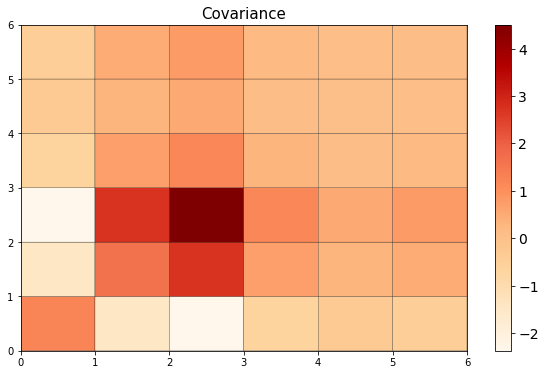

In [106]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, (detsys_dict_ppfx_energy['cov']), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [107]:
if isBlockwise == True:
    np.savetxt("nuWro_extra_unisim_uncertainties_energy_"+ending+".csv", 
                   detsys_dict_ppfx_energy['cov'],
                   delimiter =", ", 
                   fmt ='% s')

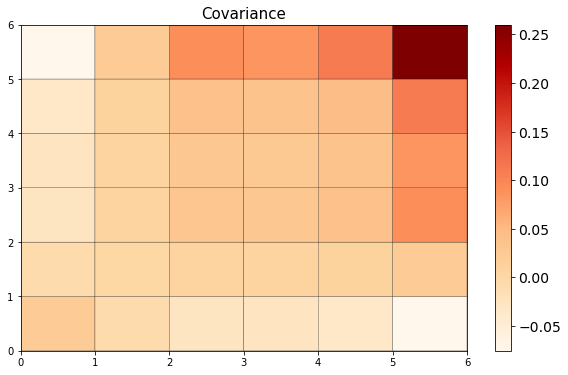

In [108]:
# Now we have the generalise this matrix to work for the combined R1 and R3

#Start with the fractional cov matrix

fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, (detsys_dict_ppfx_energy['frac_cov']), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [109]:
# Now fetch the R1+R3 CV genie value

if isBlockwise == True:
    data_signal_genie_comb_energy = pd.read_csv("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == True:
    data_signal_genie_comb_energy = pd.read_csv("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", header=None)
elif isBlockwise == False and isNue == False:
    data_signal_genie_comb_energy = pd.read_csv("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", header=None)

data_signal_genie_comb_energy = data_signal_genie_comb_energy.values[:, 0]

print(data_signal_genie_comb_energy)

[22.75025931 77.65268931 35.89616102 11.09976876  4.46142678  3.40257977]


In [110]:
#Multiply the fractional cov matrix by the new CV value

temp_cov_energy = detsys_dict_ppfx_energy['frac_cov']

comb_cov_energy = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1):
    for j in range(len(bins)-1):
        if data_signal_genie_comb_energy[i]*data_signal_genie_comb_energy[j] != 0:
            
            comb_cov_energy[i][j] += temp_cov_energy[i][j]*(data_signal_genie_comb_energy[i]*data_signal_genie_comb_energy[j])
            

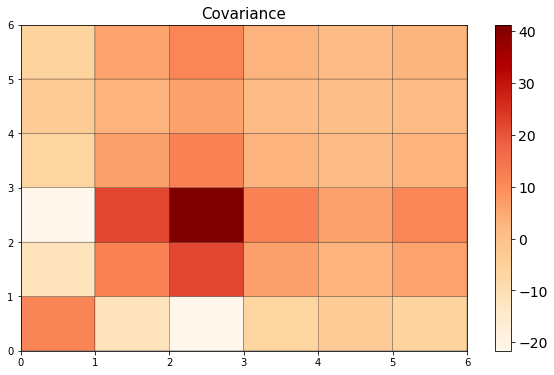

In [111]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, comb_cov_energy, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [112]:
if isBlockwise == True:
    np.savetxt("nuWro_extra_unisim_uncertainties_energy_comb_"+ending+".csv", 
                   comb_cov_energy,
                   delimiter =", ", 
                   fmt ='% s')
elif isBlockwise == False and isNue == True:
    np.savetxt("nuWro_extra_unisim_uncertainties_energy_nueonly_"+ending+".csv", 
                   comb_cov_energy,
                   delimiter =", ", 
                   fmt ='% s')
elif isBlockwise == False and isNue == False:
    np.savetxt("nuWro_extra_unisim_uncertainties_energy_numuonly_"+ending+".csv", 
                   comb_cov_energy,
                   delimiter =", ", 
                   fmt ='% s') 